In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving cats400.jpg to cats400 (2).jpg


In [17]:
def processed_image(img):
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [18]:
X, Y, size = processed_image(img)

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0208
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.6925
Epoch 3/200
1/1 [==============================] - 1s 982ms/step - loss: 0.0725
Epoch 4/200
1/1 [==============================] - 1s 980ms/step - loss: 0.0211
Epoch 5/200
1/1 [==============================] - 1s 980ms/step - loss: 0.0171
Epoch 6/200
1/1 [==============================] - 1s 989ms/step - loss: 0.0494
Epoch 7/200
1/1 [==============================] - 1s 976ms/step - loss: 0.0184
Epoch 8/200
1/1 [==============================] - 1s 983ms/step - loss: 0.0215
Epoch 9/200
1/1 [==============================] - 1s 991ms/step - loss: 0.0219
Epoch 10/200
1/1 [==============================] - 1s 985ms/step - loss: 0.0217
Epoch 11/200
1/1 [==============================] - 1s 983ms/step - loss: 0.0211
Epoch 12/200
1/1 [==============================] - 1s 968ms/step - loss: 0.0198
Epoch 13/200
1/1 [=========================

In [23]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)

Saving cats400.jpg to cats400 (3).jpg


In [24]:
output = model.predict(X)

In [25]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 10 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


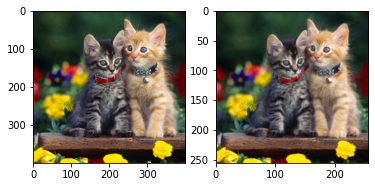

In [26]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))

In [19]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)

Saving cats400_2.jpg to cats400_2 (1).jpg


In [20]:
output = model.predict(X)

In [21]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 7 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


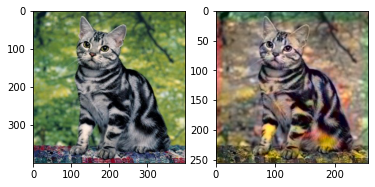

In [22]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))